In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#set visualisation
%matplotlib inline
sns.set_style("whitegrid")

/kaggle/input/my-reading-log/reading log.csv


In [2]:
df = pd.read_csv("/kaggle/input/my-reading-log/reading log.csv")

In [3]:
df.head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language
0,NaN,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,25-May-1971,Fiction,science fiction,jp
1,12-05-20,三毛猫ホームズの推理,赤川 次郎,368,y,3.0,Completed,E-Book,Kindle,KADOKAWA,角川文庫,1-Apr-1984,Fiction,Mystery,jp
2,06-24-20,ミステリ博物館,赤川 次郎,339,n,4.0,Completed,Physical Book,NaN,KADOKAWA,角川文庫,1-Jul-1985,Fiction,Mystery,jp
3,02-28-19,Jacques the Fatalist and His Master,Denis Diderot,261,y,2.5,Completed,Physical Book,NaN,Penguin Random House,Penguin Classics,30-Jan-1986,Fiction,Humour/ Satire,jp
4,02-15-18,卒業,東野 圭吾,371,y,4.5,Completed,Physical Book,NaN,講談社,講談社文庫,8-May-1989,Fiction,Mystery,jp


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion date   329 non-null    object 
 1   Title             391 non-null    object 
 2   author(s)         391 non-null    object 
 3   pages             391 non-null    int64  
 4   review            384 non-null    object 
 5   rating            345 non-null    float64
 6   status            391 non-null    object 
 7   format            391 non-null    object 
 8   platform          100 non-null    object 
 9   publisher         391 non-null    object 
 10  Imprint           391 non-null    object 
 11  publication date  391 non-null    object 
 12  type              391 non-null    object 
 13  genre             391 non-null    object 
 14  language          391 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
df.describe()

,pages,rating
count,391.000000,345.000000
mean,333.826087,3.576087
std,128.553393,1.057147
min,31.000000,1.000000
25%,256.000000,3.000000
50%,320.000000,4.000000
75%,384.000000,4.000000
max,912.000000,5.000000


# Evaluate variables

In [6]:
df['publication date'] = pd.to_datetime(df['publication date'])
df['publication_year'] = df['publication date'].dt.year
df['publication_month'] = df['publication date'].dt.month

df['completion date'] = pd.to_datetime(df['completion date'])
df['completion_year'] = df['completion date'].dt.year
df['completion_month'] = df['completion date'].dt.month

In [7]:
sum(df["completion date"].isnull())

62

In [8]:
df[(df["completion date"].isnull())& (df["status"]=="Completed")].head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
0,NaT,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,1971-05-25,Fiction,science fiction,jp,1971,5,NaN,NaN
6,NaT,注文の多い料理店,宮沢 賢治,358,n,NaN,Completed,Physical Book,NaN,新潮社,新潮文庫,1990-05-29,Fiction,Fantasy,jp,1990,5,NaN,NaN
21,NaT,どちらかが彼女を殺した,東野 圭吾,356,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,1999-05-14,Fiction,Mystery,jp,1999,5,NaN,NaN
25,NaT,悪意,東野 圭吾,376,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,2001-01-17,Fiction,Mystery,jp,2001,1,NaN,NaN
26,NaT,A Study in Scarlet & The Sign of the Four,Sir Arthur Conan Doyle,224,n,4.0,Completed,Physical Book,NaN,Wordsworth Editions,Wordsworth Editions,2001-12-05,Fiction,Mystery,eng,2001,12,NaN,NaN


In [9]:
df[(df["completion date"].isnull())& (df["status"]=="Completed")].shape[0]

53

In [10]:
df["review"].replace({"y": "Yes", "n":"No"}, inplace = True)
df["review"].head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: review, dtype: object

In [11]:
df["platform"].value_counts()

Audible      25
Libby        25
BorrowBox    24
Kindle       17
Unknown       7
Youtube       2
Name: platform, dtype: int64

In [12]:
df["platform"].replace({"Youtube": "Unknown"}, inplace = True)

In [13]:
df["genre"].nunique()

36

In [14]:
df["genre"].unique()

array(['science fiction', 'Mystery', 'Humour/ Satire', 'Literary Fiction',
       'Fantasy', 'Romance', 'Science Fiction', 'Bildungsroman',
       'Self Help', 'Picture book', 'Magical realism', 'Thriller',
       'Economics', 'Horror', 'Contemporary', 'Mathematics',
       'Self-Esteem', '経済小説', 'Dystopian', 'science', '経営書', 'Psychology',
       '仕事小説', 'Fashion', 'Humour Encyclopaedias', 'Realist Literature',
       'Physical Chemistry', 'Data', 'Law', 'Business', 'Adventure',
       'Applied Physics', 'History', 'Biographies',
       'Essays, Journals & Letters', 'Architectural History'],
      dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   completion date    329 non-null    datetime64[ns]
 1   Title              391 non-null    object        
 2   author(s)          391 non-null    object        
 3   pages              391 non-null    int64         
 4   review             384 non-null    object        
 5   rating             345 non-null    float64       
 6   status             391 non-null    object        
 7   format             391 non-null    object        
 8   platform           100 non-null    object        
 9   publisher          391 non-null    object        
 10  Imprint            391 non-null    object        
 11  publication date   391 non-null    datetime64[ns]
 12  type               391 non-null    object        
 13  genre              391 non-null    object        
 14  language  

In [16]:
df["language"].unique()

array(['jp', 'eng'], dtype=object)

In [17]:
df["language"].replace({"jp": "Japanese", "eng":"English"}, inplace = True)
df["language"]

0      Japanese
1      Japanese
2      Japanese
3      Japanese
4      Japanese
         ...   
386     English
387     English
388     English
389     English
390     English
Name: language, Length: 391, dtype: object

In [18]:
df["status"].value_counts()

Completed     381
DNF             8
incomplete      1
TBR             1
Name: status, dtype: int64

In [19]:
df["status"].replace({"incomplete": "Incomplete"}, inplace = True)
df["status"].replace({"Incomplete": "Other", "TBR": "Other"}, inplace = True)

In [20]:
df["type"].value_counts()

Fiction       341
Nonfiction     50
Name: type, dtype: int64

# EDA
## DNF

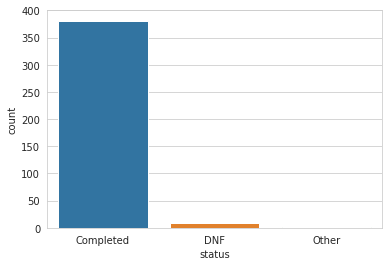

In [21]:
sns.countplot(x = "status", data = df)
plt.show()

In [22]:
DNF = df[df["status"]=="DNF"]
Completed = df[df["status"]=="Completed"]

In [23]:
sum(DNF["pages"])

2375

In [24]:
DNF["format"].value_counts()

Audiobook        7
Physical Book    1
Name: format, dtype: int64

In [25]:
if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("No duplicated authors")
else:
    print("there is an author you should avoid")

No duplicated authors


In [26]:
DNF["publisher"].nunique()

8

In [27]:
DNF["platform"].value_counts()

BorrowBox    3
Audible      2
Libby        2
Name: platform, dtype: int64

In [28]:
px.histogram(DNF, x = "publication_year", nbins=5)

In [29]:
fig = px.histogram(DNF, x = "publication_month", nbins=4)
fig.update_layout(xaxis_range = [1,12])

In [30]:
DNF["publication_month"].value_counts()

5     2
10    2
8     1
12    1
9     1
1     1
Name: publication_month, dtype: int64

In [31]:
px.histogram(DNF, x = "genre",)

# completion date unknown

In [32]:
completion_date_unknown = Completed[Completed["completion date"].isnull()]

<AxesSubplot:xlabel='language', ylabel='count'>

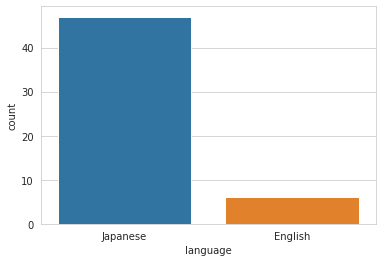

In [33]:
sns.countplot(x = "language", data = completion_date_unknown)

In [34]:
completion_date_unknown["author(s)"].value_counts()

藤崎 都                       6
東野 圭吾                      6
日丸屋 秀和                     6
三上 延                       4
谷 瑞恵                       3
伊坂 幸太郎                     3
葉山 透                       2
Sir Arthur Conan Doyle     2
朝霧 カフカ                     2
川村 元気                      1
北川 恵海                      1
福嶋ユッカ                      1
Louis Sachar               1
辻村 七子                      1
秋川 滝美                      1
Frances Hodgson Burnett    1
藤咲あゆな                      1
星 新一                       1
春河35                       1
村上 桃子                      1
若宮 シノブ, 望月 淳               1
宮沢 賢治                      1
江口 夏実                      1
水城 せとな                     1
George Orwell              1
樋野 まつり, 藤咲 あゆな             1
E.M. Forster               1
朝井 リョウ                     1
Name: author(s), dtype: int64

In [35]:
px.histogram( completion_date_unknown, x = "author(s)")

In [36]:
completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")]["format"].unique()

array(['Physical Book'], dtype=object)

<AxesSubplot:xlabel='format', ylabel='count'>

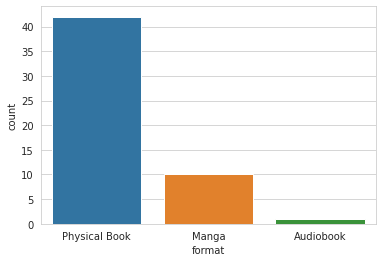

In [37]:
sns.countplot(x = "format", data = completion_date_unknown)

In [38]:
round(((completion_date_unknown[completion_date_unknown["format"]== "Physical Book"].shape[0]/completion_date_unknown.shape[0])*100), 2)

79.25

In [39]:
completion_date_unknown[completion_date_unknown["format"]== "Audiobook"]

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
349,NaT,どうしても生きてる,朝井 リョウ,323,Yes,4.0,Completed,Audiobook,Audible,幻冬舎,幻冬舎文庫,2019-10-10,Fiction,Contemporary,Japanese,2019,10,NaN,NaN


In [40]:
px.histogram( completion_date_unknown, x = "Imprint")

In [41]:
completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["Imprint"].unique()

array(['講談社文庫', '幻冬舎コミックス', '角川ルビー文庫', '文春文庫', '集英社文庫'], dtype=object)

In [42]:
px.histogram( completion_date_unknown, x = "publisher")

In [43]:
completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["publisher"].unique()

array(['講談社', '幻冬舎', 'KADOKAWA', '文藝春秋', '集英社'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

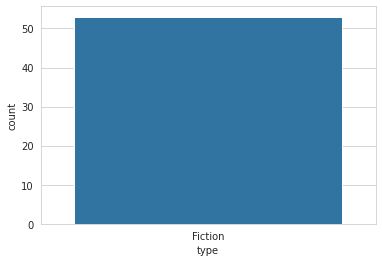

In [44]:
sns.countplot(x = "type", data = completion_date_unknown )

In [45]:
px.histogram( completion_date_unknown, x = "genre")

<AxesSubplot:xlabel='publication_year', ylabel='count'>

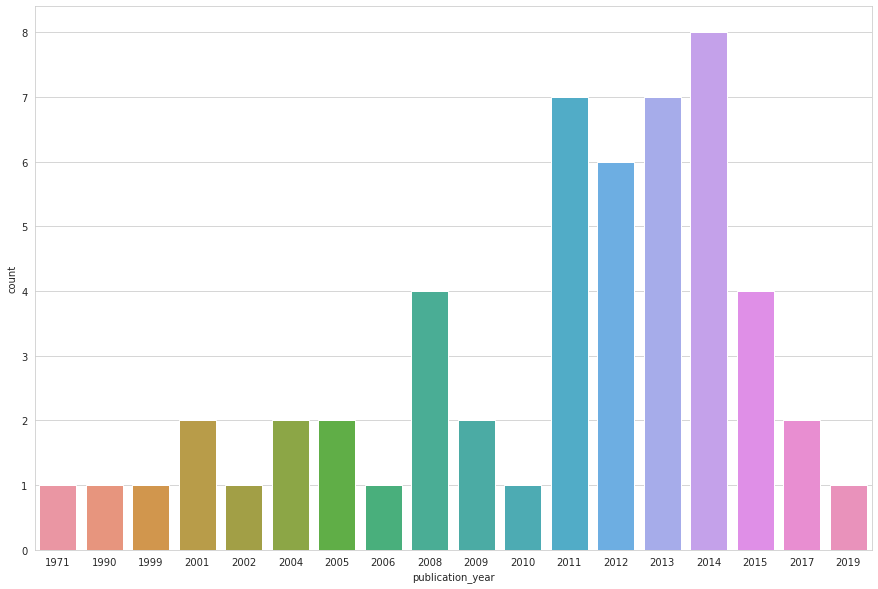

In [46]:
plt.figure(figsize = (15,10))
sns.countplot(x = "publication_year", data = completion_date_unknown )

<AxesSubplot:xlabel='review', ylabel='count'>

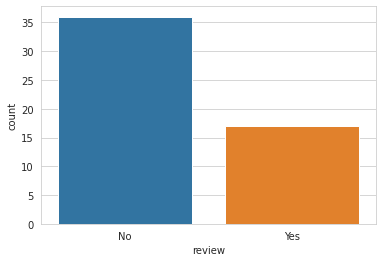

In [47]:
sns.countplot(x = "review", data = completion_date_unknown,)

In [48]:
(1-completion_date_unknown["rating"].isnull().sum()/completion_date_unknown.shape[0])*100

64.15094339622642

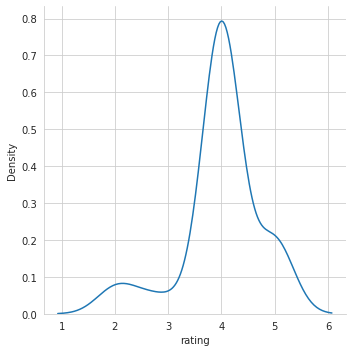

In [49]:
sns.displot(x = "rating", data = completion_date_unknown, kind= "kde")

In [50]:
completion_date_unknown["rating"].max()

5.0

# completion books

In [51]:
Completed = Completed.dropna(subset = ["completion date"])

In [52]:
fig = px.bar( Completed, x= "completion date", y = "pages")
fig.update_layout(yaxis_range = [0,1150])

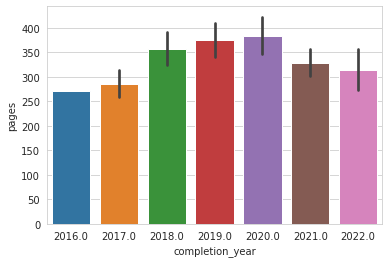

In [53]:
sns.barplot( x= "completion_year", y = "pages", data = Completed)
plt.show()

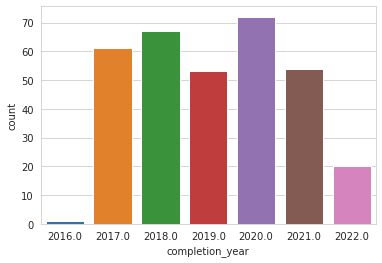

In [54]:
sns.countplot( x= "completion_year",data = Completed)
plt.show()

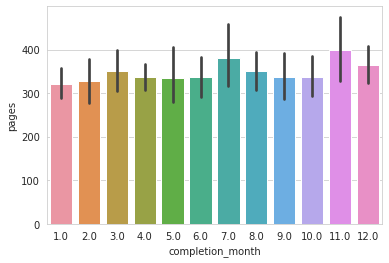

In [55]:
sns.barplot( x= "completion_month", y = "pages", data = Completed)
plt.show()

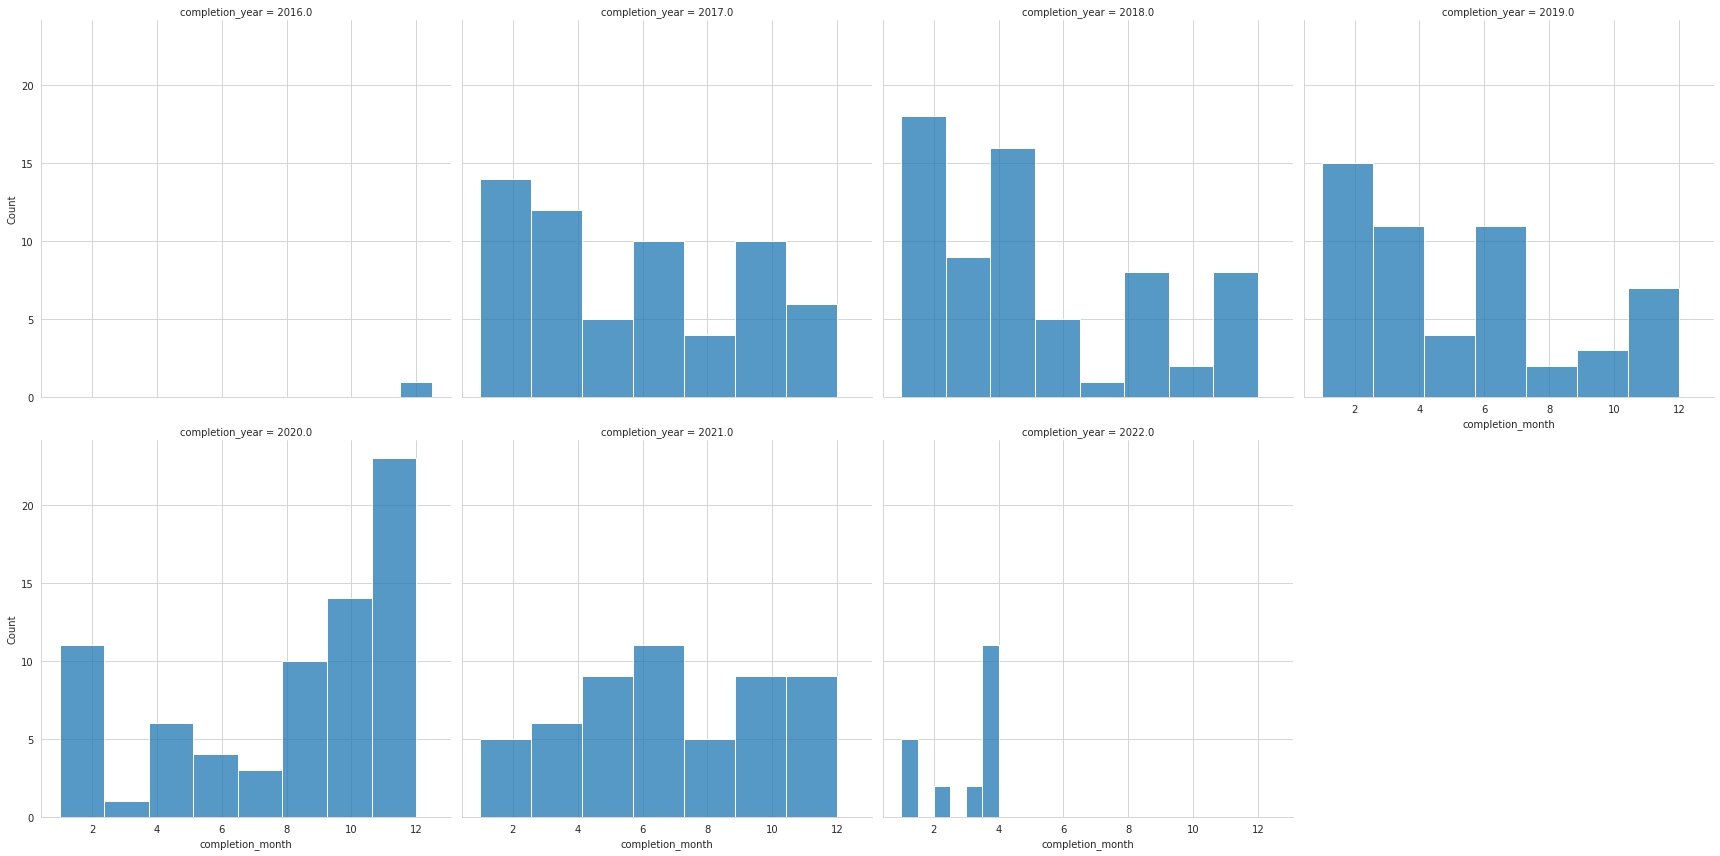

In [56]:
g = sns.FacetGrid(Completed, col='completion_year', height=6, col_wrap=4)
g.map(sns.histplot, "completion_month",)
plt.show()

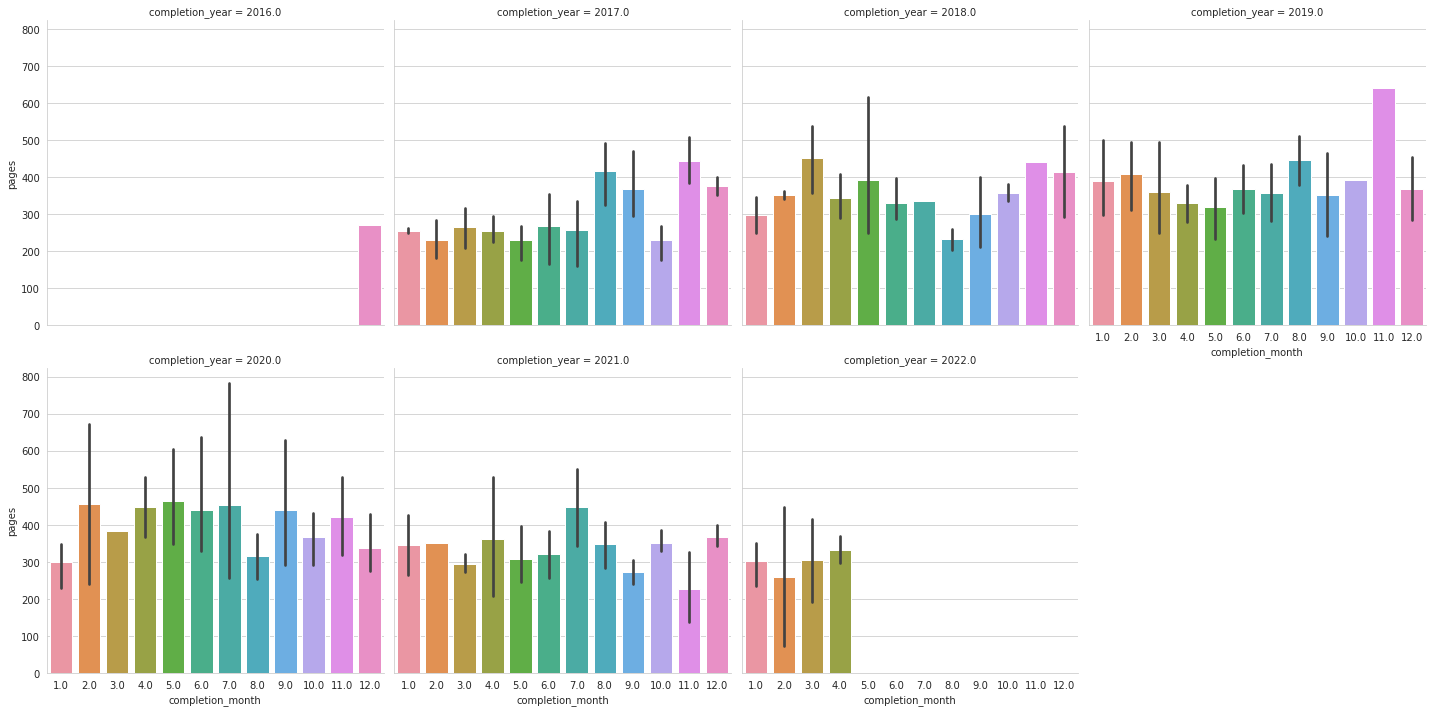

In [57]:
sns.catplot(data = Completed, x="completion_month", y = "pages", col = "completion_year", kind = "bar", col_wrap=4)

In [58]:
Completed["Title"].nunique()

317

In [59]:
rereads = df["Title"].value_counts().rename_axis ("titles").reset_index(name = "reads")
rereads[rereads["reads"]>1].head()

,titles,reads
0,ぼくは明日、昨日のきみとデートする,2
1,Economics: The User's Guide,2
2,Economics,2
3,Magpie Murders,2
4,妖怪アパートの幽雅な日常 1,2


In [60]:
rereads[rereads["reads"]>1].shape[0]

13

In [61]:
print(round((1 -Completed["Title"].nunique()/Completed.shape[0])*100,2), "% of read books were rereads")

3.35 % of read books were rereads


In [62]:
first_reads = Completed.drop_duplicates(subset = ["Title"], keep = "first"  )

fav_authors = first_reads["author(s)"].value_counts().rename_axis ("author(s)").reset_index(name = "books/reads")
fav_authors[fav_authors["books/reads"]>1].head()

,author(s),books/reads
0,東野 圭吾,15
1,谷 瑞恵,13
2,香月 日輪,8
3,伊坂 幸太郎,7
4,ふじた,6


In [63]:
px.bar(fav_authors[fav_authors["books/reads"]>2], x="author(s)", y = "books/reads" )

<AxesSubplot:xlabel='language', ylabel='count'>

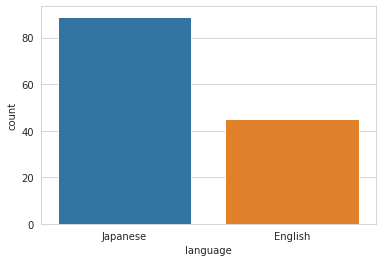

In [64]:
fav_authors = fav_authors[fav_authors["books/reads"]>2]

sns.countplot(x = "language", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])])

In [65]:
ratio = (sum(Completed[Completed["author(s)"].isin(fav_authors["author(s)"])]["language"]=="Japanese")/Completed[Completed["author(s)"].isin(fav_authors["author(s)"])].shape[0])*100
print("There were", round(ratio,2),"% more Japanese rereads than English rereads")

There were 66.42 % more Japanese rereads than English rereads


<AxesSubplot:xlabel='language', ylabel='pages'>

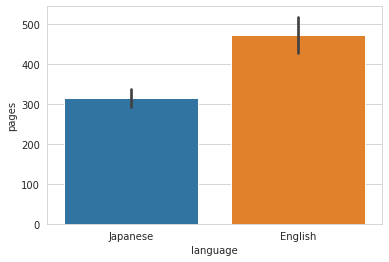

In [66]:
fav_authors = fav_authors[fav_authors["books/reads"]>2]

sns.barplot(x = "language", y = "pages", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])])

In [67]:
Completed["pages"].describe()

count    328.000000
mean     345.042683
std      132.200471
min       31.000000
25%      259.750000
50%      327.000000
75%      400.000000
max      912.000000
Name: pages, dtype: float64

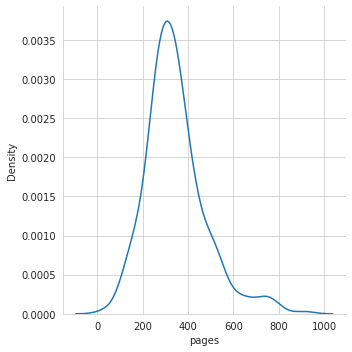

In [68]:
sns.displot(x = "pages", data = Completed, kind= "kde")
plt.show()

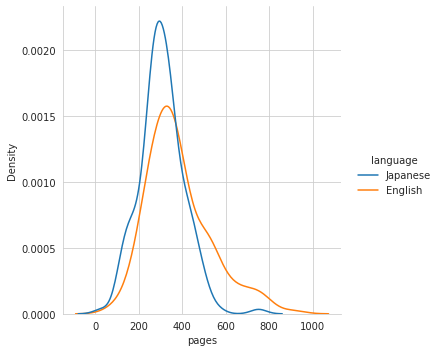

In [69]:
sns.displot(x = "pages", data = Completed, kind= "kde", hue = "language")
plt.show()

<AxesSubplot:xlabel='review', ylabel='count'>

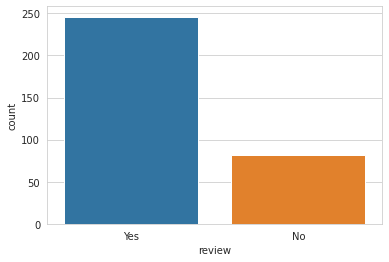

In [70]:
sns.countplot(x = "review", data = Completed)

In [71]:
print(round((Completed[Completed["review"]=="Yes"].shape[0]/Completed.dropna(subset = ["review"]).shape[0])*100, 1) ,"% of books read have been reviewed")

75.0 % of books read have been reviewed


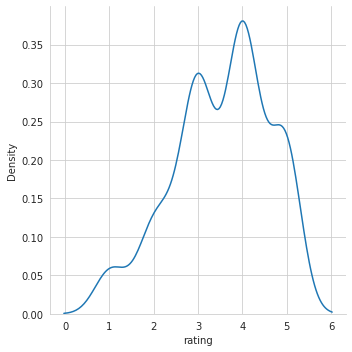

In [72]:
sns.displot(x = "rating", data = Completed, kind= "kde")

<AxesSubplot:xlabel='format', ylabel='count'>

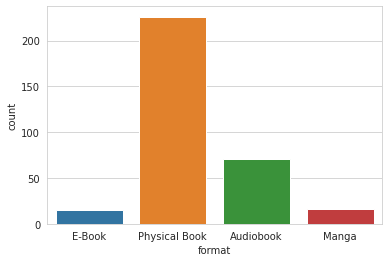

In [73]:
sns.countplot(x = "format", data = Completed)

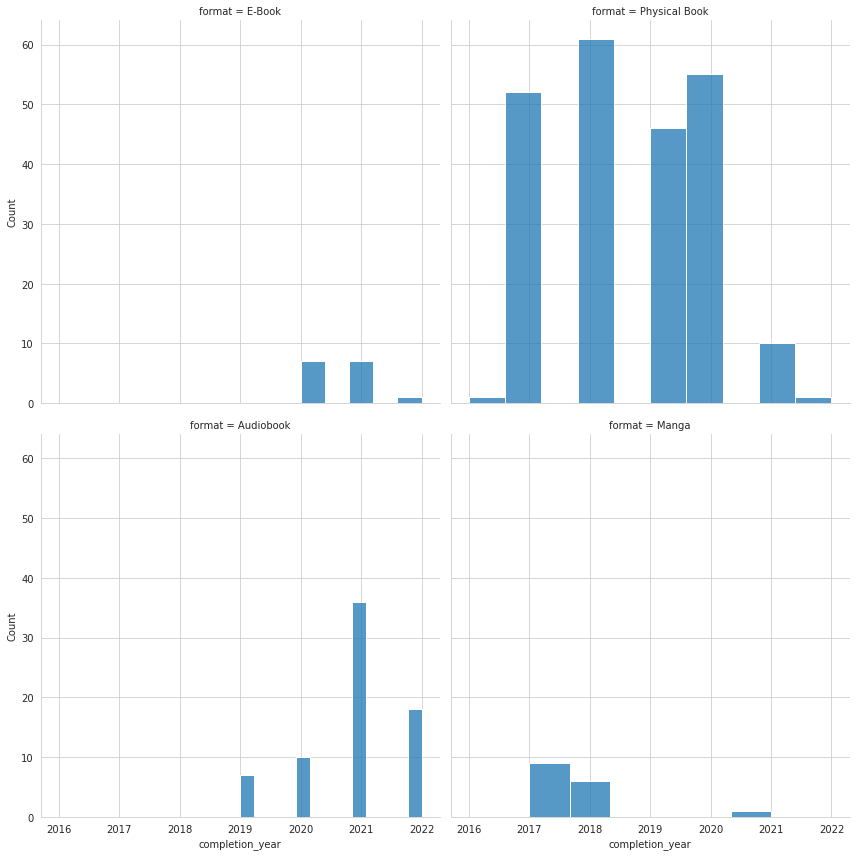

In [74]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=2)
g.map(sns.histplot, "completion_year")
plt.show()

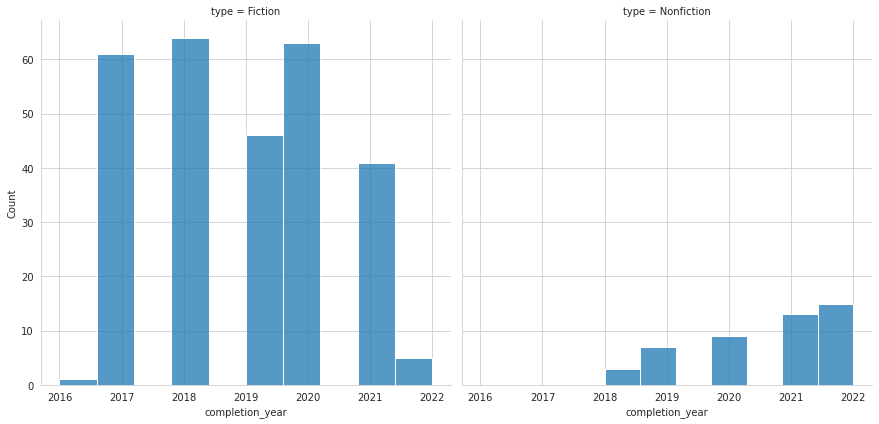

In [75]:
g = sns.FacetGrid(Completed, col='type', height=6, col_wrap=4)
g.map(sns.histplot, "completion_year")
plt.show()

<AxesSubplot:xlabel='format', ylabel='count'>

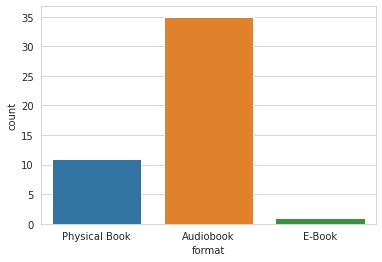

In [76]:
sns.countplot(x = "format", data = Completed[Completed["type"]=="Nonfiction"])

<AxesSubplot:xlabel='format', ylabel='count'>

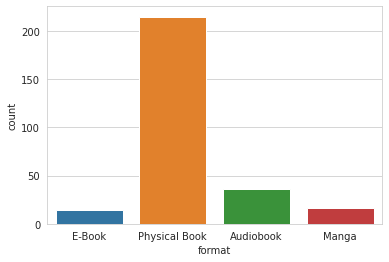

In [77]:
sns.countplot(x = "format", data = Completed[Completed["type"]=="Fiction"])

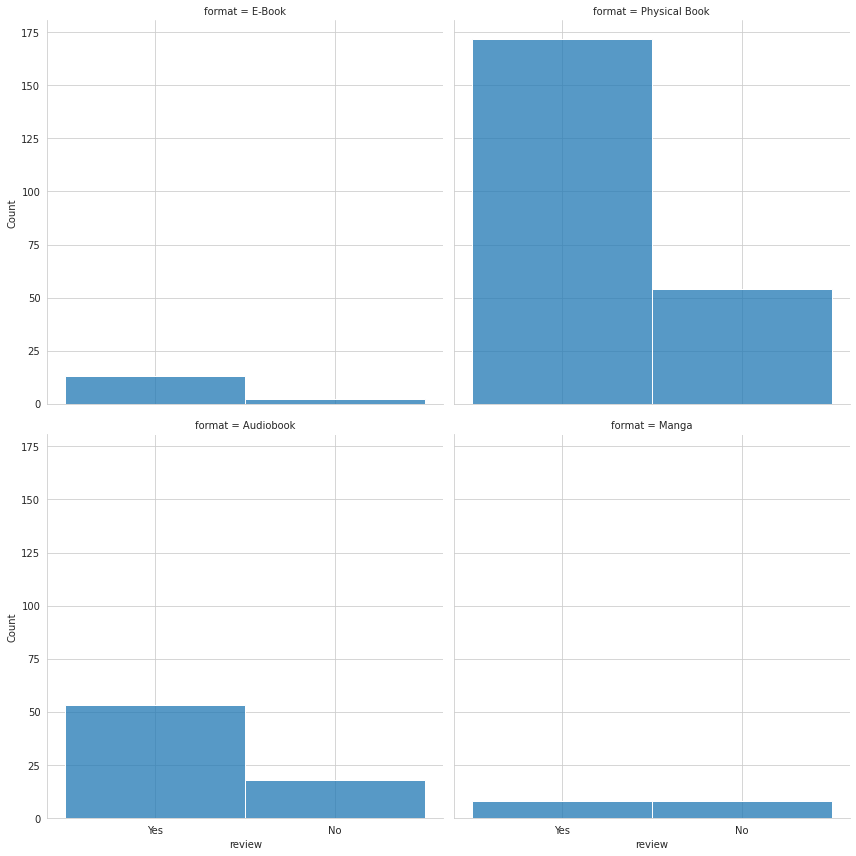

In [78]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=2)
g.map(sns.histplot, "review")
plt.show()

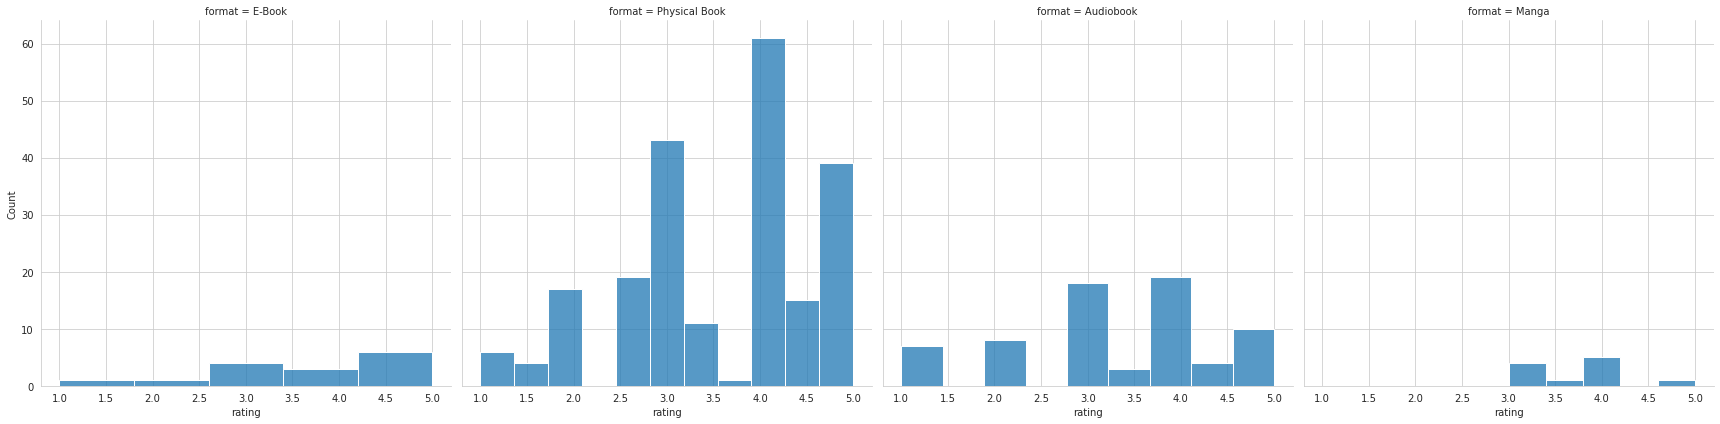

In [79]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=4)
g.map(sns.histplot, "rating")
plt.show()

<AxesSubplot:xlabel='platform', ylabel='count'>

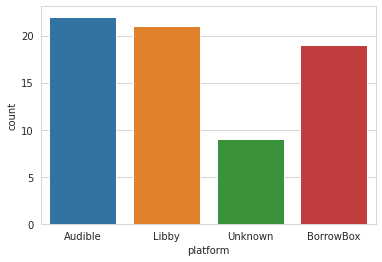

In [80]:
sns.countplot(x = "platform", data = Completed[Completed["format"]=="Audiobook"])

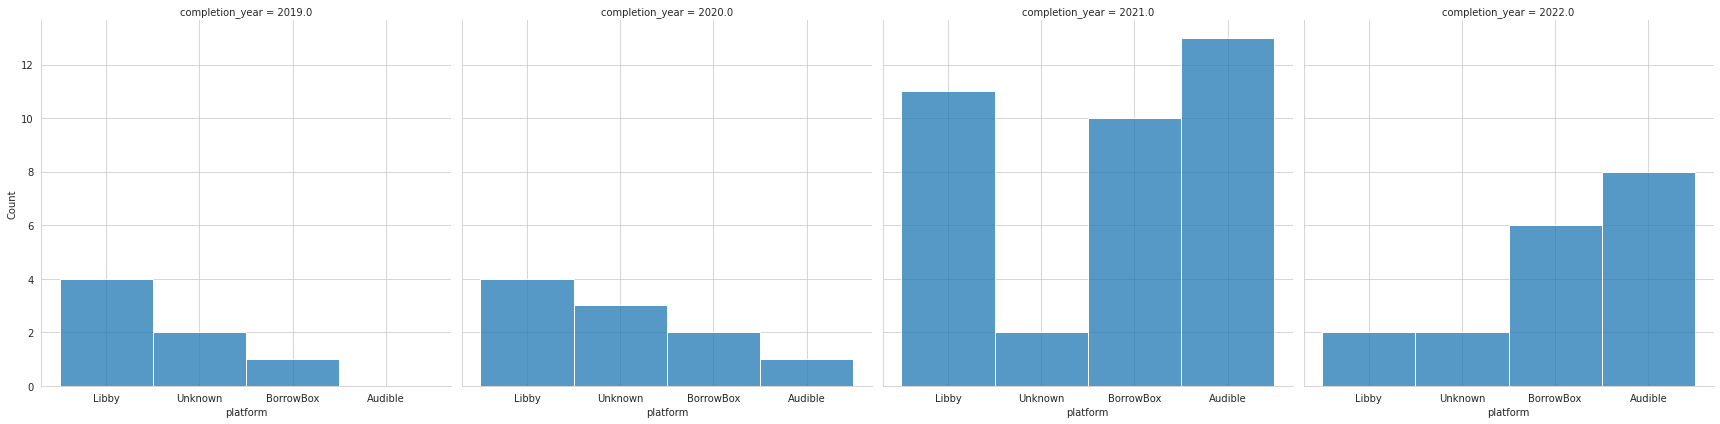

In [81]:
g = sns.FacetGrid(Completed[Completed["format"]=="Audiobook"], col='completion_year', height=6, col_wrap=4)
g.map(sns.histplot, "platform")
plt.show()

In [82]:
print(first_reads["publisher"].nunique(), first_reads["Imprint"].nunique())


56 114


In [83]:
publisher = first_reads["publisher"].value_counts().rename_axis ("publisher").reset_index(name = "books/reads")
publisher[publisher["books/reads"]>1].head(10)

,publisher,books/reads
0,Penguin Random House,55
1,KADOKAWA,52
2,集英社,23
3,講談社,22
4,HarperCollins,17
5,Macmillan Publishers,17
6,文藝春秋,13
7,Orion,12
8,新潮社,9
9,Hachette Book,9


In [84]:
Imprint = first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,Penguin,13
4,文春文庫,13
5,Penguin Classics,13
6,メディアワークス文庫,11
7,Picador,9
8,角川ホラー文庫,8
9,Gollancz,7


In [85]:
Japanese_first_reads = first_reads[first_reads["language"]=="Japanese"]
Imprint = Japanese_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint["Imprint"].nunique()

43

In [86]:
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,文春文庫,13
4,メディアワークス文庫,11
5,角川ホラー文庫,8
6,一迅社,6
7,新潮文庫,6
8,アスキーメディアワークス,5
9,光文社文庫,5


In [87]:
English_first_reads = first_reads[first_reads["language"]=="English"]
Imprint = English_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint["Imprint"].nunique()

72

In [88]:
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,Penguin,13
1,Penguin Classics,12
2,Picador,9
3,Gollancz,7
4,Vintage Classics,6
5,HarperCollins,6
6,Wordsworth Editions,5
7,Orion Children's Books,5
8,Vintage,4
9,Black Swan,4
